<a href="https://colab.research.google.com/github/houssam012/todo/blob/main/Lab_%E2%80%93_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd

# Charger le dataset Titanic
titanic_data = sns.load_dataset("titanic")
titanic_data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic_data.isnull().sum()


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)
titanic_data.dropna(subset=['embarked'], inplace=True)


<ipython-input-3-790e037bad35>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)


In [ ]:
# Supprimer la colonne 'deck'
titanic_data.drop(columns=['deck'], inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Diviser le dataset en ensembles d'entraînement et de test
X_single = titanic_data[['pclass']]
y = titanic_data['survived']
X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.3, random_state=0)

# Créer et entraîner le modèle
model_single = LogisticRegression()
model_single.fit(X_train, y_train)

# Prédire et évaluer le modèle
y_pred_single = model_single.predict(X_test)
accuracy_single = accuracy_score(y_test, y_pred_single)
precision_single = precision_score(y_test, y_pred_single)
recall_single = recall_score(y_test, y_pred_single)
f1_single = f1_score(y_test, y_pred_single)

# Afficher la précision du modèle
print("Précision (Accuracy) du modèle avec une seule variable (pclass) :", accuracy_single)


Précision (Accuracy) du modèle avec une seule variable (pclass) : 0.6704119850187266


In [ ]:
# Convertir sex en variable numérique
titanic_data['sex'] = titanic_data['sex'].map({'male': 0, 'female': 1})

# Créer un dataset avec plusieurs prédicteurs
X_multiple = titanic_data[['pclass', 'age', 'sex', 'fare']]
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y, test_size=0.3, random_state=0)


model_multiple = LogisticRegression(max_iter=1000)
model_multiple.fit(X_train, y_train)


y_pred_multiple = model_multiple.predict(X_test)
accuracy_multiple = accuracy_score(y_test, y_pred_multiple)
precision_multiple = precision_score(y_test, y_pred_multiple)
recall_multiple = recall_score(y_test, y_pred_multiple)
f1_multiple = f1_score(y_test, y_pred_multiple)


In [ ]:
# Afficher les scores pour les deux modèles
print(f"Modèle simple (pclass) - Accuracy: {accuracy_single}, Precision: {precision_single}, Recall: {recall_single}, F1: {f1_single}")
print(f"Modèle multiple - Accuracy: {accuracy_multiple}, Precision: {precision_multiple}, Recall: {recall_multiple}, F1: {f1_multiple}")


Modèle simple (pclass) - Accuracy: 0.6704119850187266, Precision: 0.6571428571428571, Recall: 0.41818181818181815, F1: 0.5111111111111111
Modèle multiple - Accuracy: 0.7640449438202247, Precision: 0.7238095238095238, Recall: 0.6909090909090909, F1: 0.7069767441860465


The model with multiple variables shows better performance compared to the single-variable model.

In [ ]:
titanic_data = pd.get_dummies(titanic_data, columns=['embarked'], drop_first=True)

X = titanic_data[['pclass', 'sex', 'age', 'fare', 'sibsp', 'parch', 'embarked_Q', 'embarked_S']]
y = titanic_data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_additional = accuracy_score(y_test, y_pred)
precision_additional = precision_score(y_test, y_pred)
recall_additional = recall_score(y_test, y_pred)
f1_additional = f1_score(y_test, y_pred)

print(f'Accuracy with additional variables: {accuracy_additional:.4f}')
print(f'Precision with additional variables: {precision_additional:.4f}')
print(f'Recall with additional variables: {recall_additional:.4f}')
print(f'F1 Score with additional variables: {f1_additional:.4f}')

Accuracy with additional variables: 0.7809
Precision with additional variables: 0.6923
Recall with additional variables: 0.7826
F1 Score with additional variables: 0.7347


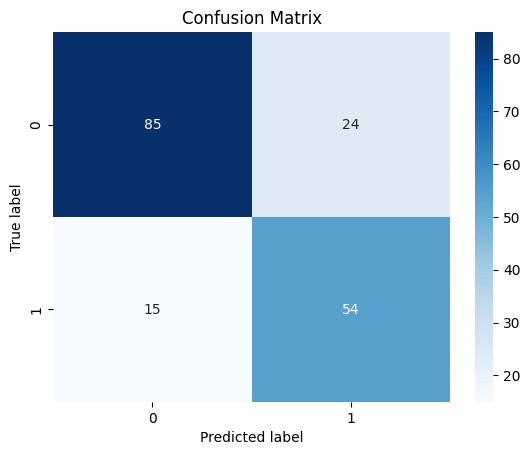

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

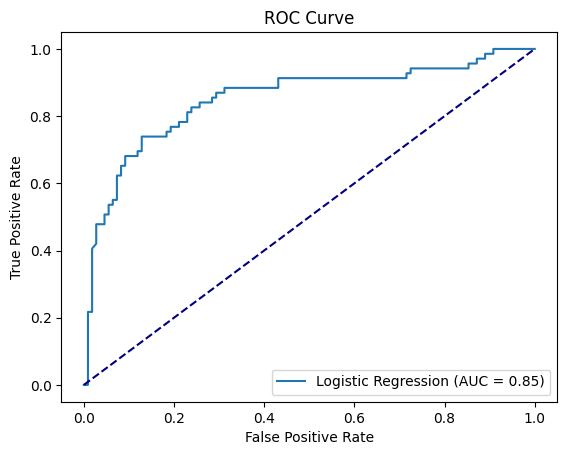

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()